In [145]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
day_data = pd.read_csv("data/day.csv")
hour_data = pd.read_csv("data/hour.csv")

In [147]:
dd = day_data.copy()
hd = hour_data.copy()

In [148]:
print(dd.shape)
print(hd.shape)

(731, 16)
(17379, 17)


In [149]:
display(dd.head(10))
display(hd.head(10))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [150]:
dd.drop(['instant', 'yr', 'mnth', 'season'], axis=1, inplace=True)
hd.drop(['instant', 'yr', 'mnth', 'season'], axis=1, inplace=True)

In [151]:
# Renaming the columns

# dd.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather', 'cnt': 'count'}, inplace=True)
# hd.rename({'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'weathersit': 'weather', 'cnt': 'count'}, inplace=True)
dd.rename(columns={'dteday': 'date', 'cnt': 'count'}, inplace=True)
hd.rename(columns={'dteday': 'date', 'hr': 'hour',
          'cnt': 'count'}, inplace=True)

In [152]:
dd.tail(10)

,date,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
721,2012-12-22,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749
722,2012-12-23,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787
723,2012-12-24,0,1,1,2,0.231304,0.258900,0.791304,0.077230,174,746,920
724,2012-12-25,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013
725,2012-12-26,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
726,2012-12-27,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,2012-12-31,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [153]:
print(dd.dtypes)
print(hd.dtypes)

date           object
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object
date           object
hour            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [154]:
# Convertin strings to pandas datetime object

dd["date"] = pd.to_datetime(dd["date"])
hd["date"] = pd.to_datetime(hd["date"])

In [155]:
# Unnormalizing the values

# x_n * (x_max - x_min) + x_min = x

dd['temp'] = dd['temp'] * (39 + 8) - 8
dd['atemp'] = dd['atemp'] * (50 + 16) - 16
dd['hum'] = dd['hum'] * (100)
dd['windspeed'] = dd['windspeed'] * 67

hd['temp'] = hd['temp'] * (39 + 8) - 8
hd['atemp'] = hd['atemp'] * (50 + 16) - 16
hd['hum'] = hd['hum'] * (100)
hd['windspeed'] = hd['windspeed'] * 67

In [156]:
# Converting binary values to boolean

dd["workingday"] = dd["workingday"].astype("bool")
hd["workingday"] = hd["workingday"].astype("bool")
dd["holiday"] = dd["holiday"].astype("bool")
hd["holiday"] = hd["holiday"].astype("bool")

In [157]:
# Checking for 0 values

print((dd["weathersit"][dd["weathersit"] == 0]).count())
print((dd["temp"][dd["temp"] == 0]).count())
print((dd["atemp"][dd["atemp"] == 0]).count())
print((dd["hum"][dd["hum"] == 0]).count())
print((dd["windspeed"][dd["windspeed"] == 0]).count())

0
0
0
1
0


In [158]:
print((hd["weathersit"][hd["weathersit"] == 0]).count())
print((hd["temp"][hd["temp"] == 0]).count())
print((hd["atemp"][hd["atemp"] == 0]).count())
print((hd["hum"][hd["hum"] == 0]).count()) 
print((hd["windspeed"][hd["windspeed"] == 0]).count())

0
0
0
22
2180


In [159]:
# # Replacing 0 Humidity with mean of hum of neighboring days
# i_0 = dd.loc[dd['hum'] == 0].index[0]
# dd.loc[i_0, 'hum'] = (dd.iloc[i_0 + 1]['hum'] + dd.iloc[i_0 - 1]['hum']) / 2

# # Replacing 0 Humidity with the average humidity of the day
# hd.loc[hd['hum'] == 0, 'hum'] = dd.loc[i_0, 'hum']


In [160]:
# Checking for NaN values
print(dd.isna().sum())
print(hd.isna().sum())

date          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
date          0
hour          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [161]:
# Checking if the count is correct
print((dd["count"] == dd["registered"] + dd["casual"]).count() == dd.shape[0])
print((hd["count"] == hd["registered"] + hd["casual"]).count() == hd.shape[0])

True
True


In [162]:
# Getting the season name from datetime

dd.loc[(dd['date'].dt.month > 11) | (
    dd['date'].dt.month < 3), 'season'] = 'Winter'
dd.loc[(dd['date'].dt.month > 2) & (
    dd['date'].dt.month < 6), 'season'] = 'Spring'
dd.loc[(dd['date'].dt.month > 5) & (
    dd['date'].dt.month < 9), 'season'] = 'Summer'
dd.loc[(dd['date'].dt.month > 8) & (
    dd['date'].dt.month < 12), 'season'] = 'Fall'
hd.loc[(hd['date'].dt.month > 11) | (
    hd['date'].dt.month < 3), 'season'] = 'Winter'
hd.loc[(hd['date'].dt.month > 2) & (
    hd['date'].dt.month < 6), 'season'] = 'Spring'
hd.loc[(hd['date'].dt.month > 5) & (
    hd['date'].dt.month < 9), 'season'] = 'Summer'
hd.loc[(hd['date'].dt.month > 8) & (
    hd['date'].dt.month < 12), 'season'] = 'Fall'

In [163]:
# Convert the values from numbers to string

weather_types = ['Clear', 'Mist', 'Mixed', 'Severe']
for i in range(0, 4):
    dd.loc[dd['weathersit'] == i + 1, 'weather'] = weather_types[i]
    hd.loc[hd['weathersit'] == i + 1, 'weather'] = weather_types[i]

dd['weather'] = pd.Categorical(dd['weather'])
hd['weather'] = pd.Categorical(hd['weather'])
dd['season'] = pd.Categorical(dd['season'])
hd['season'] = pd.Categorical(hd['season'])
dd['weekday'] = pd.Categorical(dd['date'].dt.day_name())
hd['weekday'] = pd.Categorical(hd['date'].dt.day_name())

In [164]:
dd["month"] = dd["date"].dt.month_name()
hd["month"] = hd["date"].dt.month_name()

In [165]:
dd.drop(["weathersit"], axis=1, inplace=True)
hd.drop(["weathersit"], axis=1, inplace=True)

In [166]:
hd['datetime'] = hd['date'] + hd['hour'].astype('timedelta64[h]')
hd.drop('date', axis=1, inplace=True)
display(hd['datetime'])

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
17374   2012-12-31 19:00:00
17375   2012-12-31 20:00:00
17376   2012-12-31 21:00:00
17377   2012-12-31 22:00:00
17378   2012-12-31 23:00:00
Name: datetime, Length: 17379, dtype: datetime64[ns]

In [167]:
hd.dtypes

hour                   int64
holiday                 bool
weekday             category
workingday              bool
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
count                  int64
season              category
weather             category
month                 object
datetime      datetime64[ns]
dtype: object

In [168]:
# Getting the humidity data from Historical Weather API
# Making a request 

import requests
import json
response = requests.get(url="https://archive-api.open-meteo.com/v1/archive?latitude=38.8951&longitude=-77.0364&start_date=2011-01-01&end_date=2012-12-31&hourly=relativehumidity_2m&timezone=America%2FNew_York")
response.raise_for_status()

In [169]:
# Reading json and converting it to DataFrame

hum_data = pd.read_json(response.text)
hourly_time = pd.to_datetime(pd.Series(hum_data['hourly'][0]))
hourly_hum = pd.Series(hum_data['hourly'][1]) 
frame = {
    'datetime': hourly_time,
    'humidity': hourly_hum
}                    
h_data = pd.DataFrame(frame)
display(h_data)  

,datetime,humidity
0,2011-01-01 00:00:00,93
1,2011-01-01 01:00:00,94
2,2011-01-01 02:00:00,96
3,2011-01-01 03:00:00,96
4,2011-01-01 04:00:00,98
...,...,...
17539,2012-12-31 19:00:00,54
17540,2012-12-31 20:00:00,54
17541,2012-12-31 21:00:00,54
17542,2012-12-31 22:00:00,55


In [170]:
# Looking for missing hours in the original hour data

start_date = hd['datetime'].min()
end_date = hd['datetime'].max()
continuous_range = pd.date_range(start=start_date, end=end_date, freq='H')
missing_hours = continuous_range[~continuous_range.isin(hd['datetime'])]
display(missing_hours)

DatetimeIndex(['2011-01-02 05:00:00', '2011-01-03 02:00:00',
               '2011-01-03 03:00:00', '2011-01-04 03:00:00',
               '2011-01-05 03:00:00', '2011-01-06 03:00:00',
               '2011-01-07 03:00:00', '2011-01-11 03:00:00',
               '2011-01-11 04:00:00', '2011-01-12 03:00:00',
               ...
               '2012-10-30 07:00:00', '2012-10-30 08:00:00',
               '2012-10-30 09:00:00', '2012-10-30 10:00:00',
               '2012-10-30 11:00:00', '2012-10-30 12:00:00',
               '2012-11-08 03:00:00', '2012-11-29 03:00:00',
               '2012-12-24 04:00:00', '2012-12-25 03:00:00'],
              dtype='datetime64[ns]', length=165, freq=None)

In [171]:
# Merging the original dataset with the retreived humidity data
hd = pd.merge(hd, h_data, how='inner', on='datetime')

In [172]:
# Replacing humidity values with new ones and leaving one humidity column

hd['hum'] = hd['humidity']
hd.drop('humidity', axis=1)

,hour,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,count,season,weather,month,datetime
0,0,False,Saturday,False,3.28,3.0014,93,0.0000,3,13,16,Winter,Clear,January,2011-01-01 00:00:00
1,1,False,Saturday,False,2.34,1.9982,94,0.0000,8,32,40,Winter,Clear,January,2011-01-01 01:00:00
2,2,False,Saturday,False,2.34,1.9982,96,0.0000,5,27,32,Winter,Clear,January,2011-01-01 02:00:00
3,3,False,Saturday,False,3.28,3.0014,96,0.0000,3,10,13,Winter,Clear,January,2011-01-01 03:00:00
4,4,False,Saturday,False,3.28,3.0014,98,0.0000,0,1,1,Winter,Clear,January,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,19,False,Monday,True,4.22,1.0016,54,11.0014,11,108,119,Winter,Mist,December,2012-12-31 19:00:00
17375,20,False,Monday,True,4.22,1.0016,54,11.0014,8,81,89,Winter,Mist,December,2012-12-31 20:00:00
17376,21,False,Monday,True,4.22,1.0016,54,11.0014,7,83,90,Winter,Clear,December,2012-12-31 21:00:00
17377,22,False,Monday,True,4.22,1.9982,55,8.9981,13,48,61,Winter,Clear,December,2012-12-31 22:00:00


In [173]:
# Replacing humidity values in day data with the average of the day humidity from hour data 

dd['hum'] = np.round(hd.groupby(hd['datetime'].dt.date)['hum'].mean().values, 2)
dd.head()

,date,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,count,season,weather,month
0,2011-01-01,False,Saturday,False,8.175849,7.999250,92.33,10.749882,331,654,985,Winter,Mist,January
1,2011-01-02,False,Sunday,False,9.083466,7.346774,75.09,16.652113,131,670,801,Winter,Mist,January
2,2011-01-03,False,Monday,True,1.229108,-3.499270,42.82,16.636703,120,1229,1349,Winter,Clear,January
3,2011-01-04,False,Tuesday,True,1.400000,-1.999948,58.09,10.739832,108,1454,1562,Winter,Clear,January
4,2011-01-05,False,Wednesday,True,2.666979,-0.868180,59.74,12.522300,82,1518,1600,Winter,Clear,January


In [228]:
sns.set_theme()
sns.set_style('darkgrid')
sns.set(rc={
    'axes.labelsize': 15,
    'axes.titlesize': 15,
    'axes.titlepad': 10,
    'xtick.labelsize': 10,
    'xtick.color': 'grey',
    'ytick.labelsize': 10,
    'ytick.color': 'grey',
    }) 

In [175]:
def convert_to_k(ax):
    '''Function for converting ylabels count from thousands to k'''
    ylabels = ["{:,.0f}".format(y) + "K" for y in ax.get_yticks() / 1000]
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(ylabels)

In [176]:
def hide_spines(ax):
    [ax.spines[spine].set_visible(False)
    for spine in ["top", "right", "bottom", "left"]]

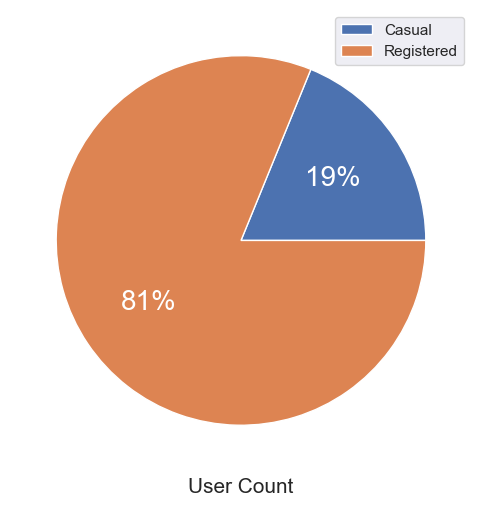

In [177]:
fig, ax = plt.subplots(figsize=(6, 6))

labels = ['Casual', 'Registered']
users = [dd['casual'].sum(), dd['registered'].sum()]
plt.pie(users, autopct='%.0f%%', textprops={'fontsize': 20, 'color': 'w'})
plt.legend(labels=labels)
plt.xlabel('User Count')
plt.show()

Text(0.5, 0, 'Month')

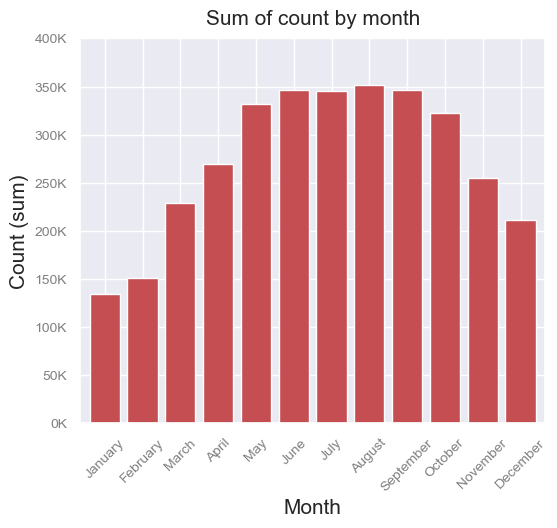

In [229]:
fig, ax = plt.subplots(figsize=(6, 5))

dd.groupby("month", sort=False)["count"].sum().plot(
    kind="bar", width=0.8, color="r", ax=ax
)
convert_to_k(ax)
plt.title("Sum of count by month")
plt.xticks(rotation=45)
plt.ylabel("Count (sum)")
plt.xlabel("Month")

Text(0.5, 0, 'Month')

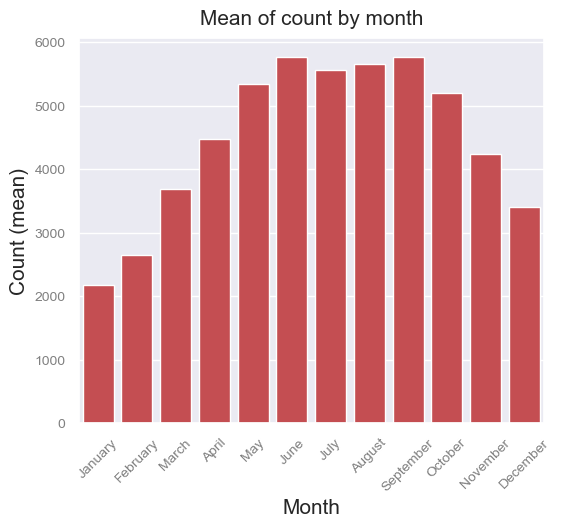

In [230]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(
    data=dd,
    x="month",
    y="count",
    estimator="mean",
    color="#c44e52",
    saturation=1,
    errorbar=None,
    ax=ax,
)
plt.title("Mean of count by month")
plt.xticks(rotation=45)
plt.ylabel("Count (mean)")
plt.xlabel("Month")

Text(0.5, 0, 'Month')

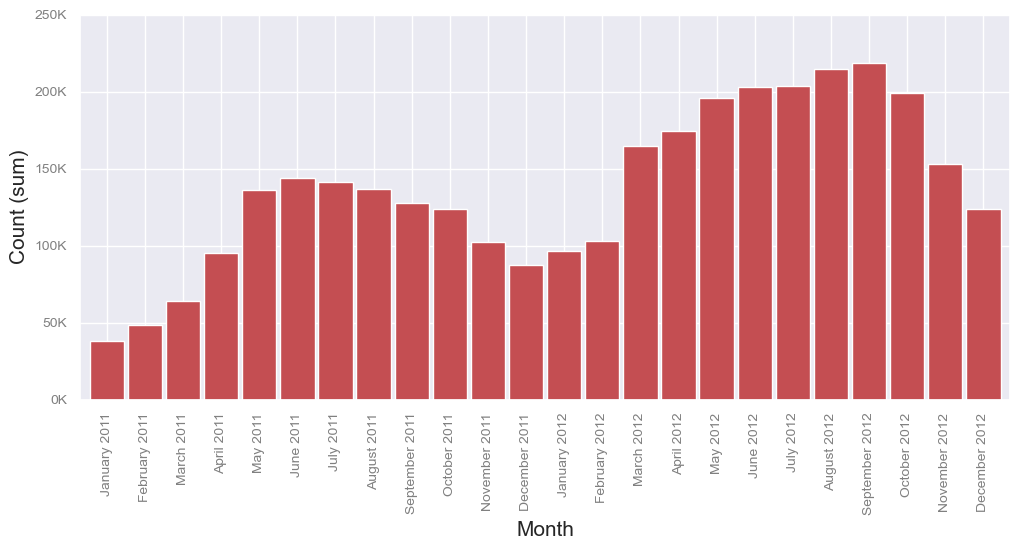

In [180]:
fig, ax = plt.subplots(figsize=(12, 5))

months = dd.groupby(pd.Grouper(key="date", freq='M'))
months["count"].sum().plot(
    kind="bar", 
    width=0.9,
    color='r',
    ax=ax
)
convert_to_k(ax)

xlabels = [m.strftime('%B %Y') for m, g in months]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(xlabels)
plt.xticks(rotation=90)

plt.ylabel("Count (sum)")
plt.xlabel("Month")

Text(0.5, 0, 'Month')

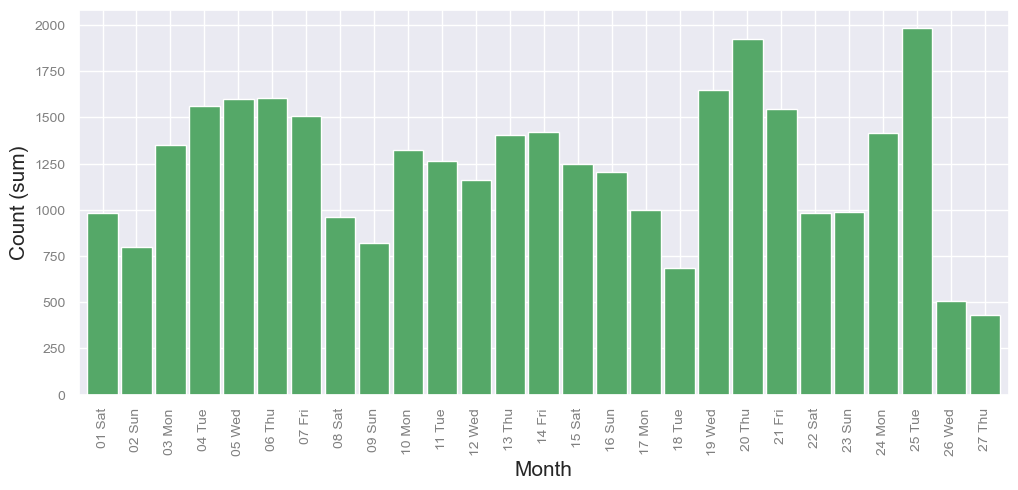

In [181]:
fig, ax = plt.subplots(figsize=(12, 5))

days = dd[dd['date'] < '2011-01-28'].groupby(pd.Grouper(key="date", freq='D'))
days["count"].sum().plot(
    kind="bar", 
    width=0.9,
    color='g',
    ax=ax
)
# convert_to_k(ax)

xlabels = [d.strftime('%d %a') for d, g in days]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(xlabels)
plt.xticks(rotation=90)

plt.ylabel("Count (sum)")
plt.xlabel("Month")

Text(0.5, 0, 'Hour')

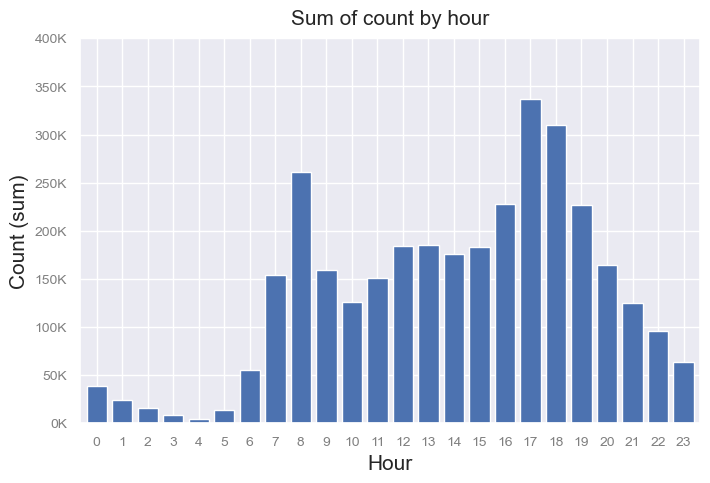

In [234]:
fig, ax = plt.subplots(figsize=(8, 5))

hd.groupby("hour", sort=False)["count"].sum().plot(
    kind="bar", width=0.8, color="b", ax=ax
)

convert_to_k(ax)

plt.title("Sum of count by hour")
plt.xticks(
    rotation=0,
    fontsize=10,
    color="grey",
)

plt.ylabel("Count (sum)")
plt.xlabel("Hour")

Text(0.5, 0, 'Hour')

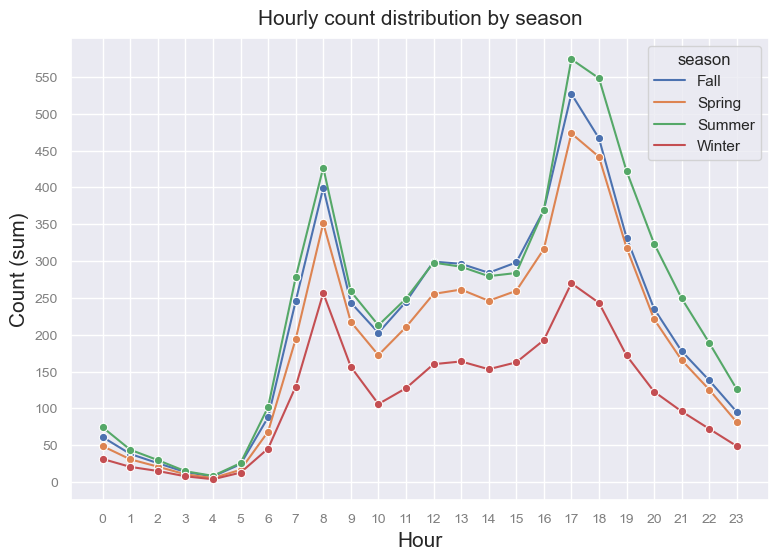

In [233]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(
    data=hd,
    x="hour",
    y="count",
    estimator="mean",
    hue='season',
    color="#c44e52",
    errorbar=None,
    marker='o',
    ax=ax,
)


ax.set_xticks(np.arange(0, 24, 1))
ax.set_yticks(np.arange(0, 600, 50))
plt.title("Hourly count distribution by season")
plt.ylabel("Count (sum)")
plt.xlabel("Hour")

Text(0.5, 0, 'Hour')

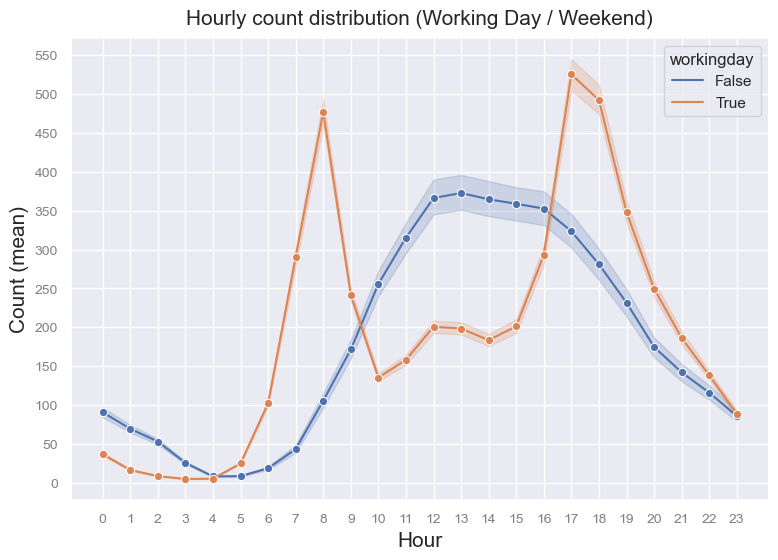

In [235]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(
    data=hd,
    x="hour",
    y="count",
    hue='workingday',
    estimator="mean",
    color="#c44e52",
    # errorbar=None,
    marker='o',
    ax=ax,
)
# ax.set_yticks(np.arange(0, 300000, 25000))
# convert_to_k(ax)

ax.set_xticks(np.arange(0, 24, 1))
ax.set_yticks(np.arange(0, 600, 50))
plt.title("Hourly count distribution (Working Day / Weekend)")

plt.ylabel("Count (mean)")
plt.xlabel("Hour")

Text(0.5, 0, 'Hour')

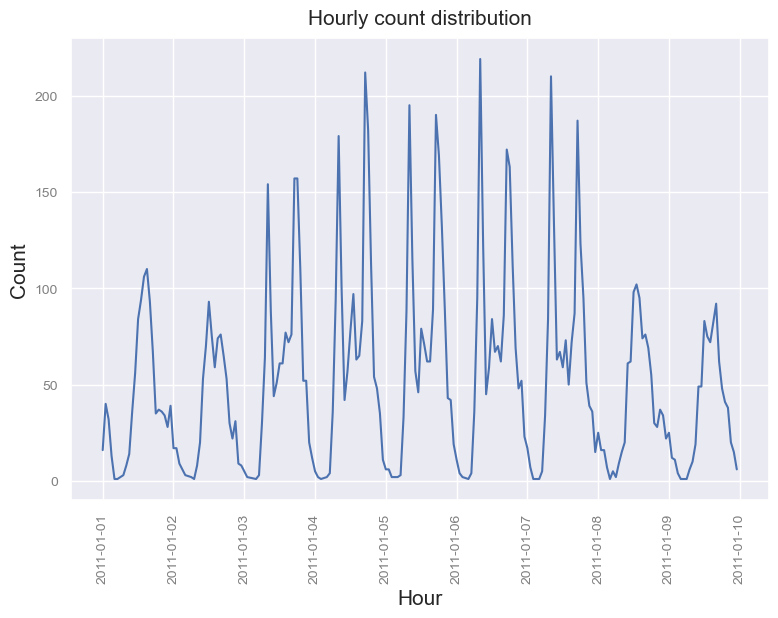

In [236]:
fig, ax = plt.subplots(figsize=(9, 6))

end='2011-01-10 00:00:00'

sns.lineplot(
    data=hd,
    x=hd[hd['datetime']<end]['datetime'],
    y="count",
    color="b",
    ax=ax,
)
# ax.set_yticks(np.arange(0, 300000, 25000))
# 
ax.set_xticks(pd.date_range(start='2011-01-01 00:00:00', end=end, freq='D'))
plt.title("Hourly count distribution")
plt.xticks(rotation=90)

plt.ylabel("Count")
plt.xlabel("Hour")

Text(0.5, 0, 'Hour')

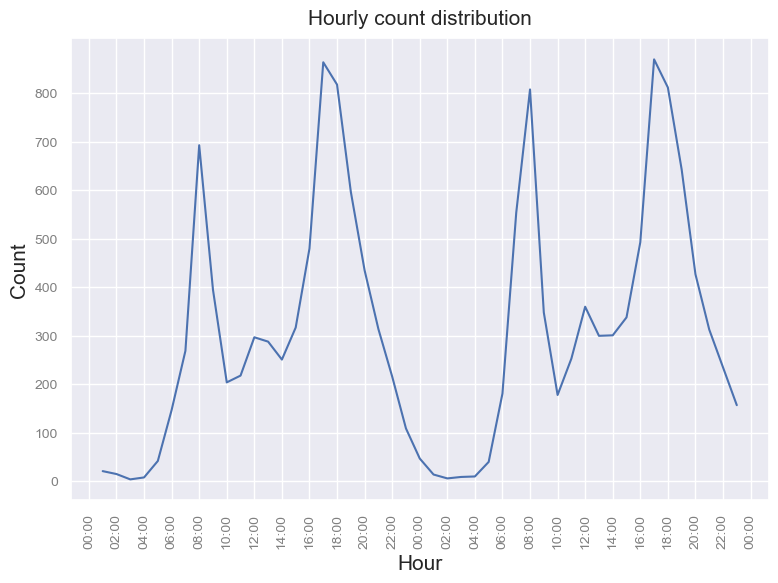

In [237]:
fig, ax = plt.subplots(figsize=(9, 6))
start = "2012-08-28 00:00:00"
end = "2012-08-30 00:00:00"
sns.lineplot(
    data=hd,
    x=hd[
        (hd["datetime"] < end)
        & (hd["datetime"] > start)
    ]["datetime"],
    y="count",
    color="b",
    ax=ax,
)


ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M'))
ax.set_yticks(np.arange(0, 900, 100))
ax.set_xticks(pd.date_range(start=start, end=end, freq='2H'))
plt.title("Hourly count distribution")
plt.xticks(rotation=90)

plt.ylabel("Count")
plt.xlabel("Hour")

In [189]:
hd.head()

,hour,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,count,season,weather,month,datetime,humidity
0,0,False,Saturday,False,3.28,3.0014,93,0.0,3,13,16,Winter,Clear,January,2011-01-01 00:00:00,93
1,1,False,Saturday,False,2.34,1.9982,94,0.0,8,32,40,Winter,Clear,January,2011-01-01 01:00:00,94
2,2,False,Saturday,False,2.34,1.9982,96,0.0,5,27,32,Winter,Clear,January,2011-01-01 02:00:00,96
3,3,False,Saturday,False,3.28,3.0014,96,0.0,3,10,13,Winter,Clear,January,2011-01-01 03:00:00,96
4,4,False,Saturday,False,3.28,3.0014,98,0.0,0,1,1,Winter,Clear,January,2011-01-01 04:00:00,98


Text(0.5, 0, 'Hour')

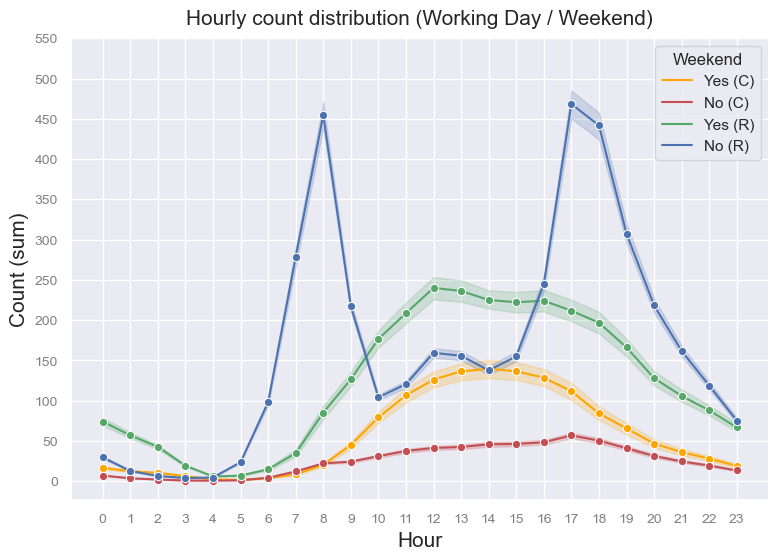

In [238]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(
    data=hd,
    x="hour",
    y="casual",
    estimator="mean",
    hue='workingday',
    palette=['orange', 'r'],
    # errorbar=None,
    marker='o',
    ax=ax,
)
sns.lineplot(
    data=hd,
    x="hour",
    y="registered",
    hue='workingday',
    palette=['g', 'b'],
    estimator="mean",
    color="g",
    # errorbar=None,
    marker='o',
    ax=ax,
)

ax.set_yticks(np.arange(0, 600, 50))
ax.set_xticks(np.arange(0, 24, 1))

L = ax.legend(title='Weekend')
[L.get_texts()[i].set_text(['Yes (C)', 'No (C)', 'Yes (R)', 'No (R)'][i]) for i in range(4)]

plt.title("Hourly count distribution (Working Day / Weekend)")
plt.ylabel("Count (sum)")
plt.xlabel("Hour")

Text(0.5, 0, 'Hour')

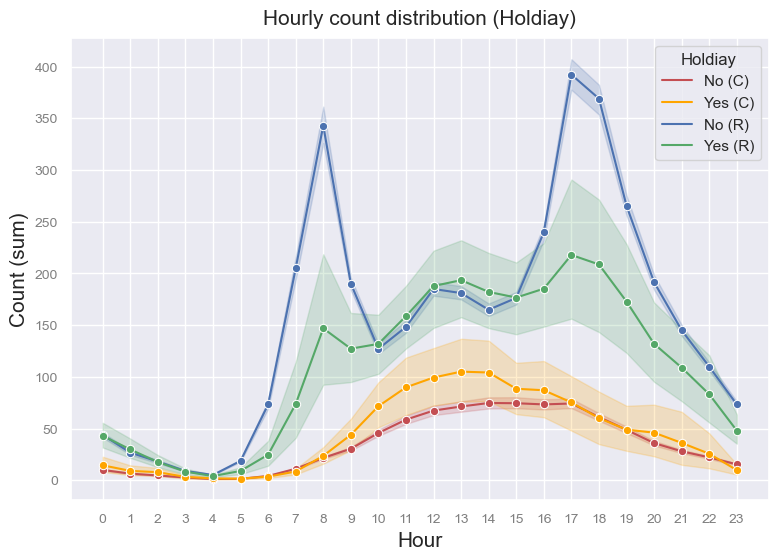

In [239]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(
    data=hd,
    x="hour",
    y="casual",
    estimator="mean",
    hue='holiday',
    palette=['r', 'orange'],
    # errorbar=None,
    marker='o',
    ax=ax,
)
sns.lineplot(
    data=hd,
    x="hour",
    y="registered",
    hue='holiday',
    palette=['b', 'g'],
    estimator="mean",
    color="g",
    # errorbar=None,
    marker='o',
    ax=ax,
)

ax.set_yticks(np.arange(0, 450, 50))
ax.set_xticks(np.arange(0, 24, 1))

L = ax.legend(title='Holdiay')
[L.get_texts()[i].set_text(['No (C)', 'Yes (C)', 'No (R)', 'Yes (R)'][i]) for i in range(4)]

plt.title("Hourly count distribution (Holdiay)")
plt.ylabel("Count (sum)")
plt.xlabel("Hour")

Text(0.5, 0, 'Weekday')

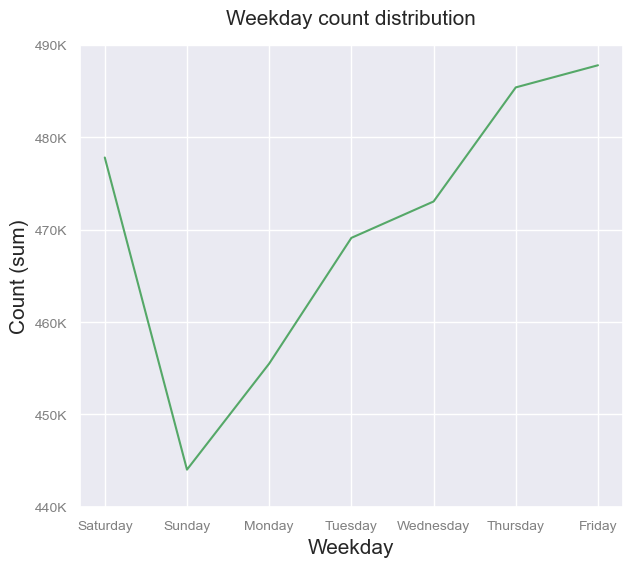

In [192]:
fig, ax = plt.subplots(figsize=(7, 6))

hd.groupby("weekday", sort=False)["count"].sum().plot(
    kind="line", 
    # width=0.8, 
    color="g", 
    ax=ax
)

convert_to_k(ax)

plt.title("Weekday count distribution", fontsize=15, pad=15)
plt.xticks(rotation=0)

plt.ylabel("Count (sum)")
plt.xlabel("Weekday")

Text(0.5, 0, 'Weekday')

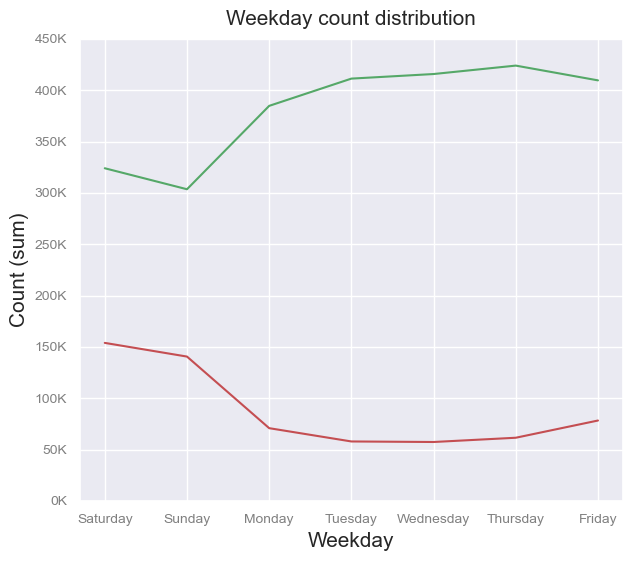

In [240]:
fig, ax = plt.subplots(figsize=(7, 6))

hd.groupby("weekday", sort=False)["casual"].sum().plot(
    kind="line", color="r", ax=ax
)
hd.groupby("weekday", sort=False)["registered"].sum().plot(
    kind="line", color="g", ax=ax
)

convert_to_k(ax)

plt.title("Weekday count distribution")
plt.ylabel("Count (sum)")
plt.xlabel("Weekday")

Text(0.5, 0, 'Weekday')

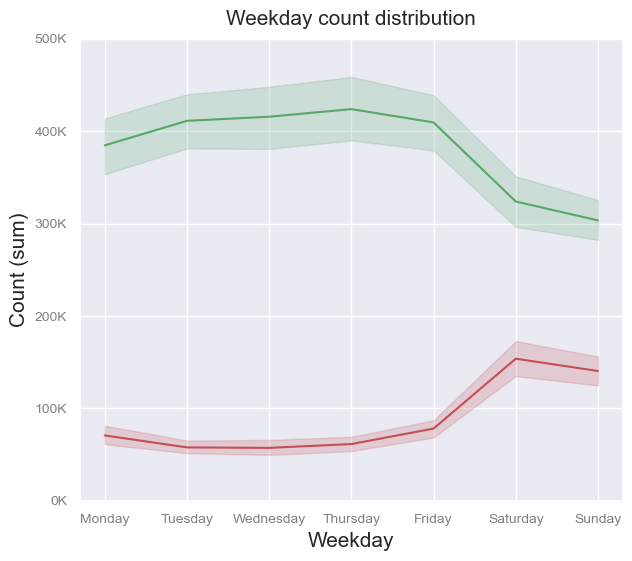

In [241]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dd['weekday'] = pd.Categorical(dd['weekday'],
                                   categories=weekdays,
                                   ordered=True)

fig, ax = plt.subplots(figsize=(7, 6))

sns.lineplot(data=dd, x=dd['weekday'].sort_values(), y='casual', estimator='sum', color='r', ax=ax)
sns.lineplot(data=dd, x=dd['weekday'].sort_values(), y='registered', estimator='sum', color='g', ax=ax)

convert_to_k(ax)

plt.title("Weekday count distribution")
plt.ylabel("Count (sum)")
plt.xlabel("Weekday")

Text(0, 0.5, 'Count (sum)')

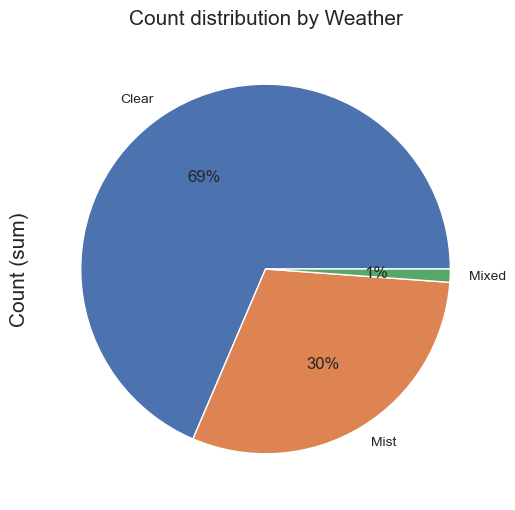

In [242]:
fig, ax = plt.subplots(figsize=(6, 6))

dd.groupby('weather')['count'].sum().plot(kind='pie', autopct='%.0f%%', ax=ax)

plt.title("Count distribution by Weather")
plt.ylabel("Count (sum)")

Text(0.5, 0, 'Weather')

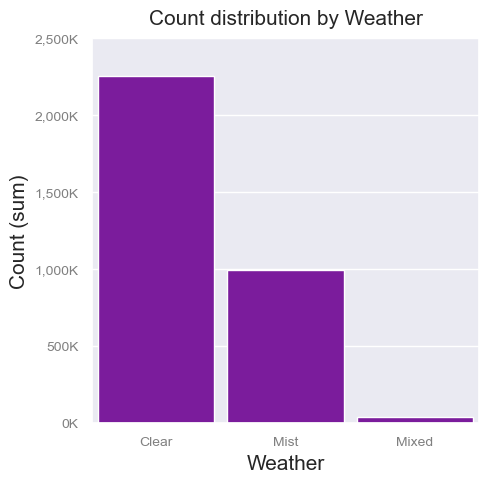

In [243]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(
    data=dd,
    x="weather",
    y="count",
    estimator="sum",
    color="#7b1c9c",
    saturation=1,
    errorbar=None,
    width=0.9,
    ax=ax,
)
convert_to_k(ax)

plt.title("Count distribution by Weather")
plt.ylabel("Count (sum)")
plt.xlabel("Weather")

Text(0.5, 0, 'Temp')

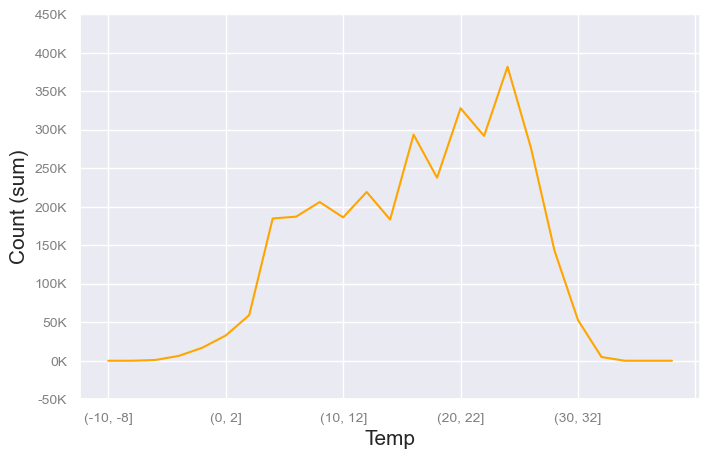

In [244]:
fig, ax = plt.subplots(figsize=(8, 5))

dd.groupby(pd.cut(dd["temp"], np.arange(-10, 41, 2)))["count"].sum().plot(
    kind="line", color='orange'
)
convert_to_k(ax)

# ax.set_xticks(np.arange(-10, 41, 1))
plt.ylabel("Count (sum)")
plt.xlabel("Temp")

Text(0.5, 0, 'Temp')

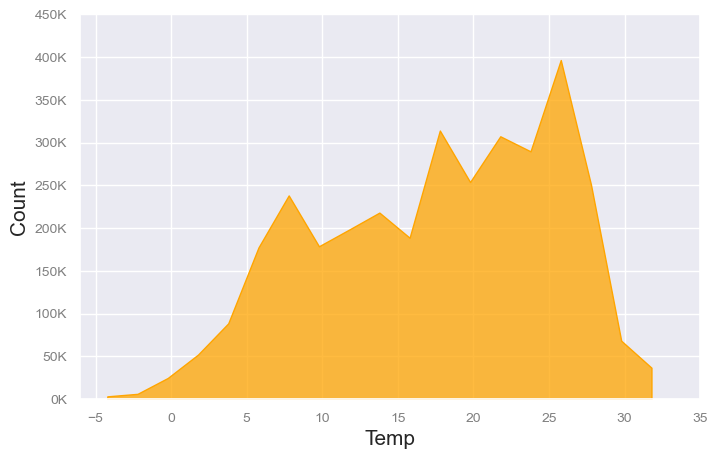

In [245]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(
    data=dd, x="temp", 
    weights="count", 
    # bins=np.arange(-10, 41, 2), 
    binwidth=2, 
    # discrete=True,
    element='poly',
    color='orange',
    # fill=False,
    ax=ax
)
ax.set_xticks(np.arange(-5, 40, 5))
convert_to_k(ax)

plt.ylabel("Count")
plt.xlabel("Temp")

Text(0.5, 0, 'Feel Temp')

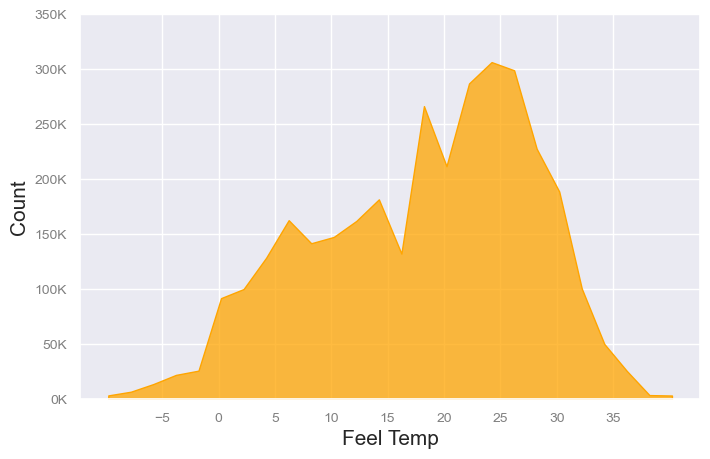

In [246]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(
    data=dd, x="atemp", 
    weights="count", 
    # bins=np.arange(-10, 41, 2), 
    binwidth=2, 
    # discrete=True,
    element='poly',
    color='orange',
    # fill=False,
    ax=ax
)
ax.set_xticks(np.arange(-5, 40, 5))
convert_to_k(ax)

plt.ylabel("Count")
plt.xlabel("Feel Temp")

Text(0.5, 0, 'Wind Speed')

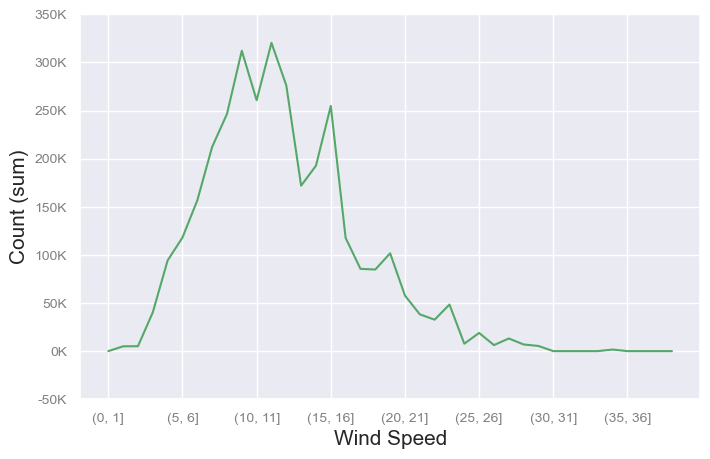

In [247]:
fig, ax = plt.subplots(figsize=(8, 5))

wind_bins = pd.cut(dd["windspeed"], np.arange(0, 40, 1))

dd.groupby(wind_bins)["count"].sum().plot(
    kind="line", color='g'
)

convert_to_k(ax)

plt.ylabel("Count (sum)")
plt.xlabel("Wind Speed")

Text(0.5, 0, 'Wind Speed')

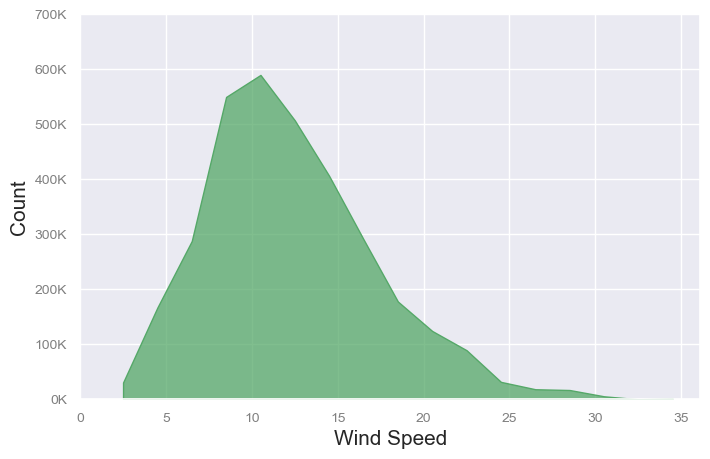

In [248]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(
    data=dd, x="windspeed", 
    weights="count", 
    # bins=np.arange(-10, 41, 2), 
    binwidth=2, 
    # discrete=True,
    element='poly',
    # fill=False,
    color='g',
    ax=ax
)
ax.set_xticks(np.arange(0, 40, 5))
convert_to_k(ax)

plt.ylabel("Count")
plt.xlabel("Wind Speed")

Text(0.5, 0, 'Humidity')

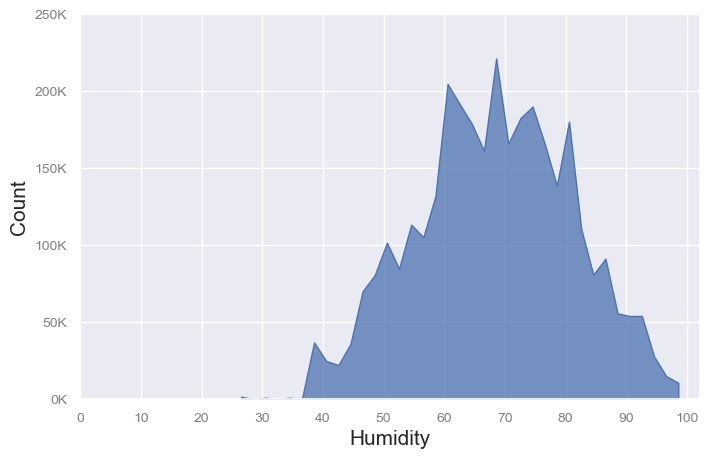

In [249]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(
    data=dd, 
    x="hum", 
    weights="count", 
    # bins=np.arange(-10, 41, 2), 
    binwidth=2, 
    # discrete=True,
    element='poly',
    # fill=False,
    color='b',
    ax=ax
)
ax.set_xticks(np.arange(0, 110, 10))
convert_to_k(ax)

plt.ylabel("Count")
plt.xlabel("Humidity")

<Axes: >

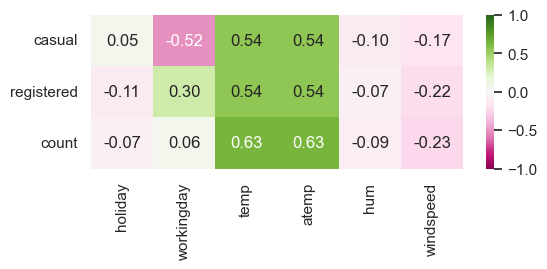

In [203]:
fig, ax = plt.subplots(figsize=(6, 2))

sns.heatmap(
        dd.corr(numeric_only=True).iloc[6:9, 0:6],  
        annot=True,
        fmt=".2f",
        cmap="PiYG",
        # mask=mask,
        vmin=-1,
        vmax=1,
)

In [204]:
td = pd.read_csv('data/2011-2012-trip-data.csv')

In [205]:
dd['count'].sum()

3292679

In [206]:
td.shape

(3255678, 9)

In [207]:
td.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual


In [208]:
td.isna().sum()

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
dtype: int64

In [209]:
td.columns = td.columns.str.lower()

In [210]:
td.loc[td['member type'] == 'Unknown']

,duration,start date,end date,start station number,start station,end station number,end station,bike number,member type
414633,501,2011-06-09 14:34:39,2011-06-09 14:43:00,31205,21st & I St NW,31232,7th & F St NW / National Portrait Gallery,W00182,Unknown
424868,2233,2011-06-11 17:40:02,2011-06-11 18:17:15,31215,Georgetown Harbor / 30th St NW,31214,17th & Corcoran St NW,W00812,Unknown
787755,257,2011-08-31 10:17:31,2011-08-31 10:21:48,31218,L'Enfant Plaza / 7th & C St SW,31219,10th St & Constitution Ave NW,W00239,Unknown
1059539,443,2011-11-06 01:29:12,2011-11-06 01:36:35,31010,S Glebe & Potomac Ave,31013,Eads & 22nd St S,W01017,Unknown
1384594,1181,2012-02-18 17:20:47,2012-02-18 17:40:29,31232,7th & F St NW / National Portrait Gallery,31201,15th & P St NW,W00880,Unknown
1554304,125,2012-03-26 01:47:39,2012-03-26 01:49:45,31241,Thomas Circle,31203,14th & Rhode Island Ave NW,W00825,Unknown
1700456,1341,2012-04-19 16:23:59,2012-04-19 16:46:20,31014,Lynn & 19th St North,31007,Crystal City Metro / 18th & Bell St,W20053,Unknown
1702913,1039,2012-04-19 20:17:07,2012-04-19 20:34:27,31215,Georgetown Harbor / 30th St NW,31609,Maine Ave & 7th St SW,W01191,Unknown
1706947,384,2012-04-20 14:34:16,2012-04-20 14:40:41,31234,20th & O St NW / Dupont South,31246,M St & Pennsylvania Ave NW,W00491,Unknown
2083866,2242,2012-06-20 00:05:36,2012-06-20 00:42:59,31235,19th St & Constitution Ave NW,31220,US Dept of State / Virginia Ave & 21st St NW,W00703,Unknown


<Axes: xlabel='member type', ylabel='count'>

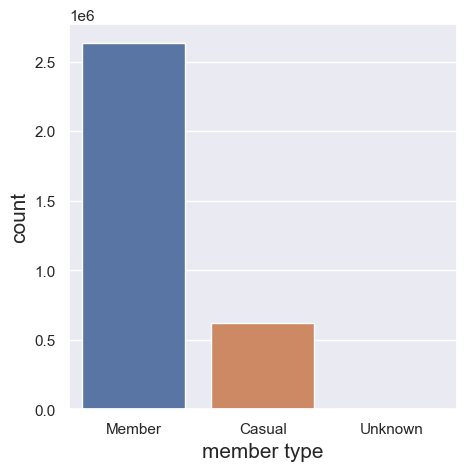

In [211]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.countplot(data=td, x='member type')

In [212]:
td['start date'] = pd.to_datetime(td['start date'])
td['end date'] = pd.to_datetime(td['end date'])

In [213]:
td['member type'] = pd.Categorical(td['member type'])

In [214]:
td.dtypes

duration                         int64
start date              datetime64[ns]
end date                datetime64[ns]
start station number             int64
start station                   object
end station number               int64
end station                     object
bike number                     object
member type                   category
dtype: object

In [215]:
td.head()

,duration,start date,end date,start station number,start station,end station number,end station,bike number,member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual
